<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S13/S13%20Assignment-A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [377]:
import cv2
import numpy as np

**Mount Google Drive**

In [378]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


**Load Yolo Weights & Config**

In [379]:
# Load YOLO
net = cv2.dnn.readNet("/content/gdrive/My Drive/yolo/yolov3.weights", "/content/gdrive/My Drive/yolo/yolov3.cfg")
classes = []
with open("/content/gdrive/My Drive/yolo/coco.names.txt", "r") as f:
  classes = [line.strip() for line in f.readlines()]
del classes[80:83] # this was some extras space that got added by mistake, change later don't forget
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [380]:
len(classes)

80

In [381]:
#Get Yolo Layers
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [382]:
layer_names = net.getLayerNames()

# Yolo Layers
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

**Load Input Image/s**

In [383]:
img1 = cv2.imread("/content/gdrive/My Drive/yolo/ocvYolo-Almg2.jpeg") # read the image using OpenCV
img2 = cv2.imread("/content/gdrive/My Drive/yolo/bookImage.jpg")
img3 = cv2.imread("/content/gdrive/My Drive/data/IMG_20200705_144735.jpg")
img4 = cv2.imread("/content/gdrive/My Drive/data/goldie2.jpg")
img5 = cv2.imread("/content/gdrive/My Drive/data/IMG_20200705_142803.jpg")
img6 = cv2.imread("/content/gdrive/My Drive/data/IMG_20200705_142805.jpg")



img = cv2.resize(img3, None, fx=0.4, fy=0.4) # Resize the image, with 
height, width, channels = img.shape # (512, 384, 3)
img.shape

(1037, 778, 3)

**Output of YoloLayers**

In [394]:
# Detecting Objects
blob = cv2.dnn.blobFromImage(img, 0.00392, size=(416,416), mean=(0,0,0), swapRB=True, crop=False)
net.setInput(blob)
output = net.forward(output_layers)
output #type List

[array([[0.04637612, 0.03228866, 0.29353425, ..., 0.        , 0.        ,
         0.        ],
        [0.0599227 , 0.03869155, 0.23000623, ..., 0.        , 0.        ,
         0.        ],
        [0.05441134, 0.02598383, 0.99909526, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96294403, 0.9511228 , 0.41121447, ..., 0.        , 0.        ,
         0.        ],
        [0.9672191 , 0.96621394, 0.323901  , ..., 0.        , 0.        ,
         0.        ],
        [0.96584153, 0.9655111 , 0.834129  , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02331164, 0.02882766, 0.05302617, ..., 0.        , 0.        ,
         0.        ],
        [0.01780067, 0.02700059, 0.21388134, ..., 0.        , 0.        ,
         0.        ],
        [0.02731626, 0.02048526, 0.08985822, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9775835 , 0.97617596, 0.04094853, ..., 0.        , 0.        ,
         0.        

#**Object Detection** 

In [410]:
# Compiled all these into a Function
def detectObj(img): #:--> Pass in the image path as img argument for this function

  # read the image
  img = cv2.imread(img)
  img = cv2.resize(img, None, fx=0.4, fy=0.4)
  height, width, channels = img.shape
  print("Image Shape: ", img.shape)

  # Detecting objects
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

  # Setting the input
  net.setInput(blob)
  outs = net.forward(output_layers)

  class_ids, confidences, boxes  = [], [], []

  for out in outs: # outs len=3
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores) # holding on to the max score
          confidence = scores[class_id] 
          if confidence > 0.5:
              # Object detected
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)

              # Rectangle coordinates
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)

              # appending bounding box dims
              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  # Non-Max Suppression
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  font = cv2.FONT_HERSHEY_SIMPLEX
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          color = colors[i]
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
          cv2.putText(img, label, (x, y + 30), font, 2, color, 2)
         

  
  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()



#***Test Results***

Image Shape:  (1037, 778, 3)


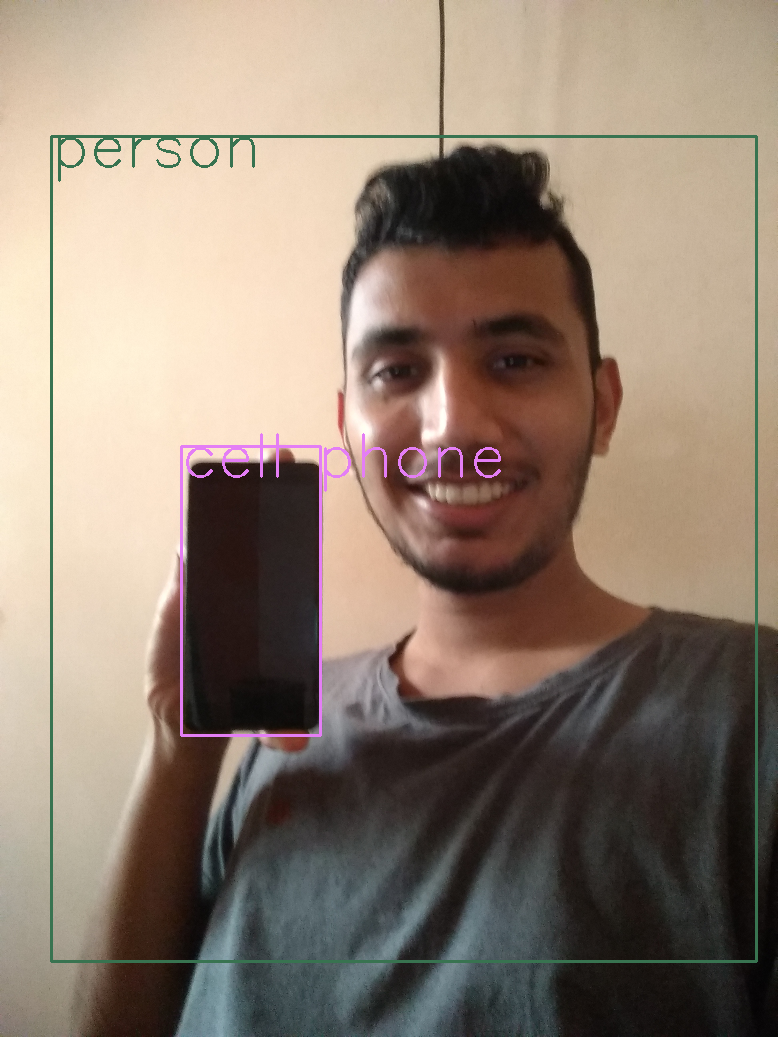

In [411]:
detectObj("/content/gdrive/My Drive/data/IMG_20200705_144735.jpg") #Classes:--> Cellphone, Person


Image Shape:  (1037, 778, 3)


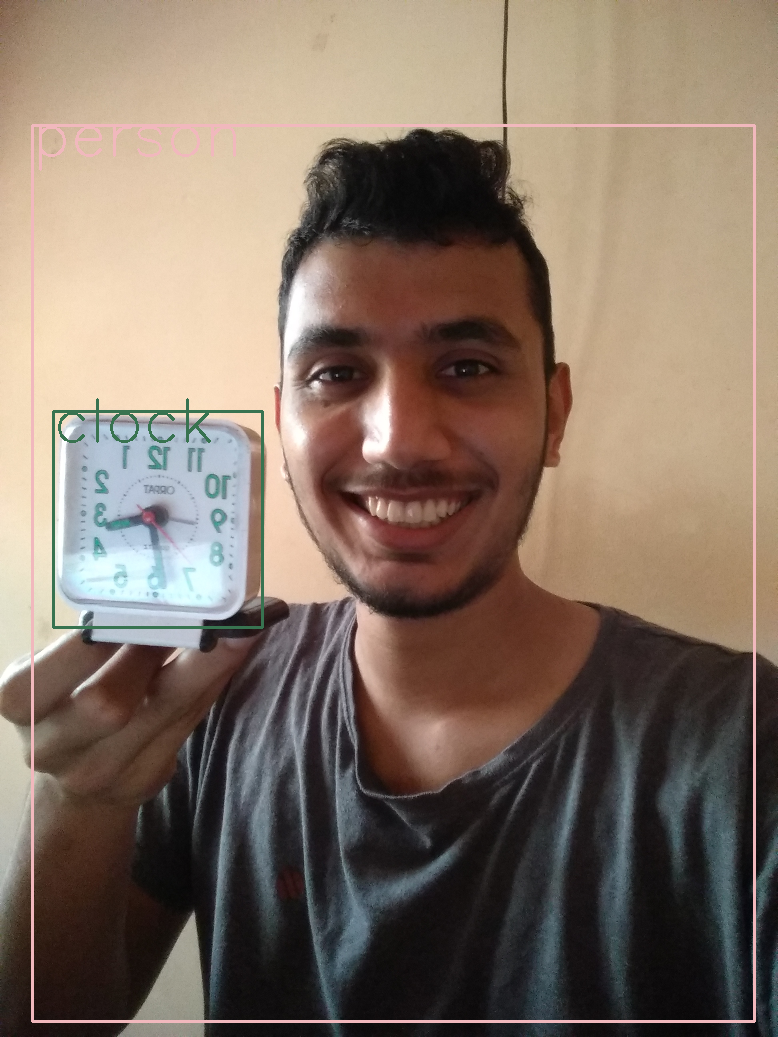

In [412]:
detectObj("/content/gdrive/My Drive/data/IMG_20200705_151909.jpg") #Classes:--> Person, Clock

In [397]:
bbox

[[51, 196, 705, 825], [183, 531, 141, 259], [181, 521, 139, 289]]